<a href="https://colab.research.google.com/github/A0143704/TC4033-Vision-C-Equipo-3/blob/main/Morphological_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Morphological Operations**
A00143704 Moisés Rangel Silva

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [57]:
img = cv2.imread("/content/data/DSC00896.JPG")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("/content/data/DSC00896.JPG",0)

(1280, 960, 3) (1280, 960, 3) (1280, 960)


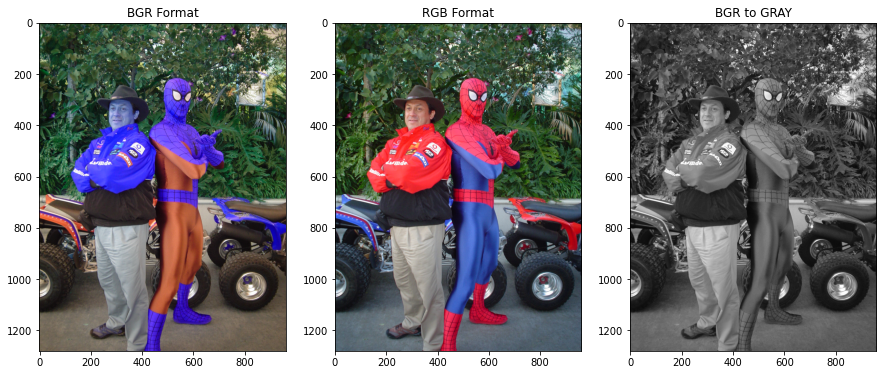

In [58]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()
    
imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

Erosión

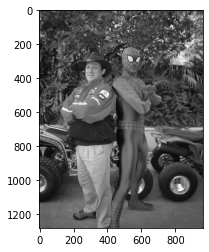

In [59]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

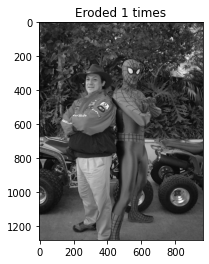

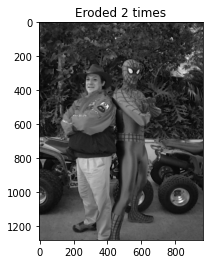

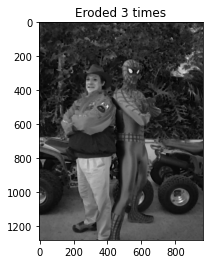

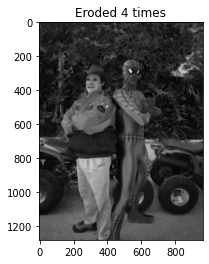

In [60]:
# erosion a 4 niveles
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()
    
for i in range(0,4):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

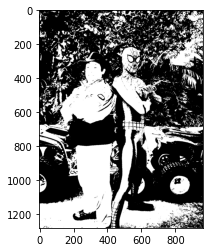

In [61]:
# Binarizando la imagen
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

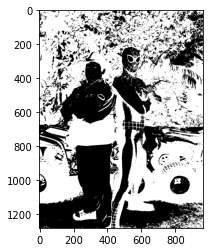

In [62]:
# inversión de imagen
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [63]:
# Kernel de 7x7
kernel = np.ones((7,7), np.uint8)
print(kernel)

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


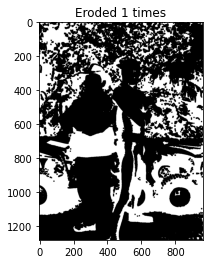

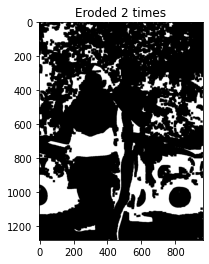

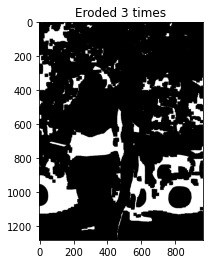

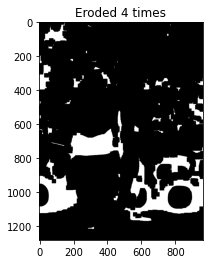

In [64]:
# erosión a 4 niveles
for i in range(0,4):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

Dilation

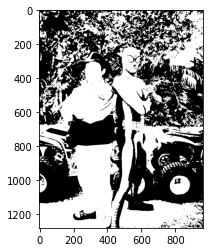

In [65]:
# Binarizando la imagen
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#Diltatación de la imagen
dilation = cv2.dilate(binr, kernel, iterations=1)
 
plt.imshow(dilation, cmap='gray')
plt.show()

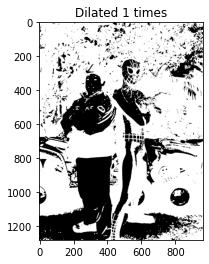

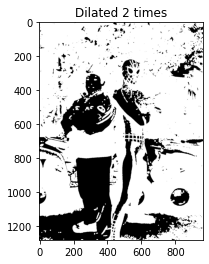

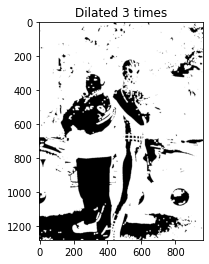

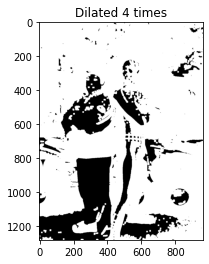

In [66]:
# dilatación a 4 niveles
for i in range(0,4):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

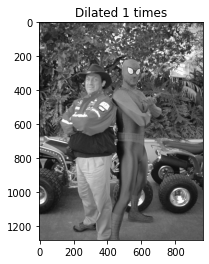

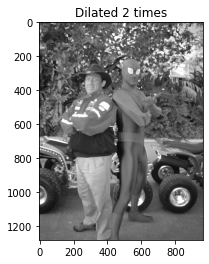

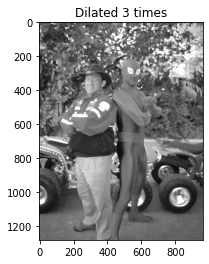

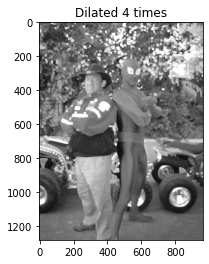

In [67]:
# dilatación a 4 niveles
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

Opening

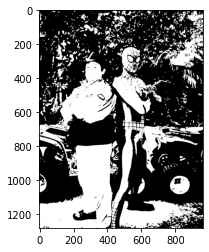

In [68]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

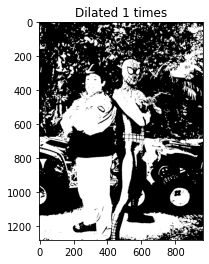

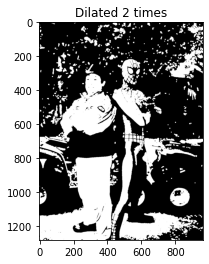

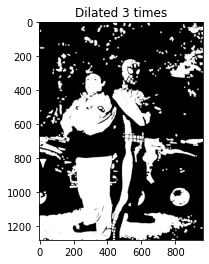

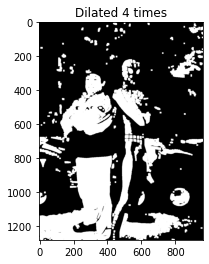

In [69]:
# Opening 4 niveles
for i in range(0,4):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

Closing

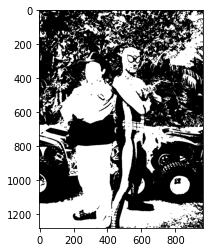

In [70]:
#closing imagen
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)
 
#print output
plt.imshow(closing,cmap='gray')
plt.show()

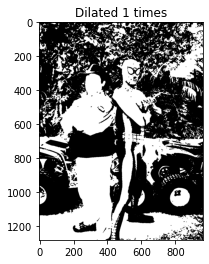

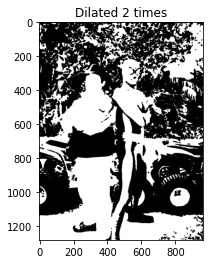

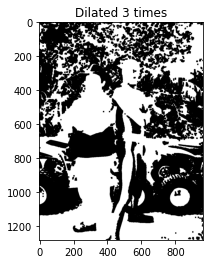

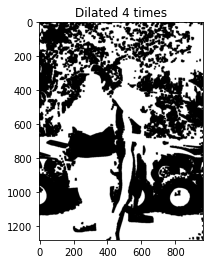

In [71]:
# Closing en 4 niveles
for i in range(0,4):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),closing)
    plt.show()

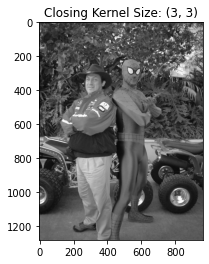

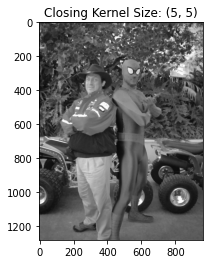

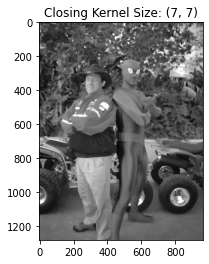

In [72]:
# diferentes kernels
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)

**Gradiente Morfológico**

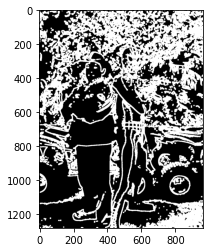

In [73]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)
 
#print output
plt.imshow(morph_gradient, cmap='gray')
plt.show()

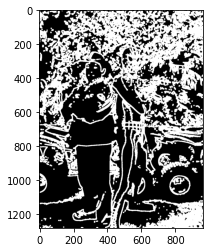

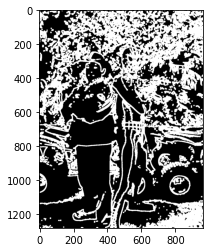

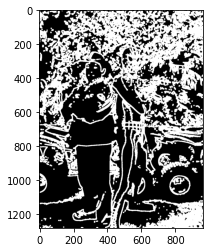

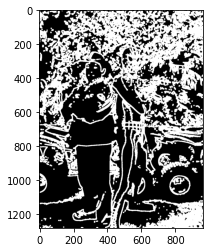

In [74]:
# gradiente en cuator niveles
for i in range(0,4): 
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

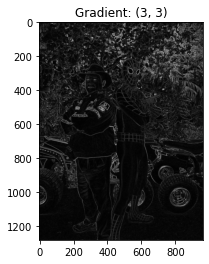

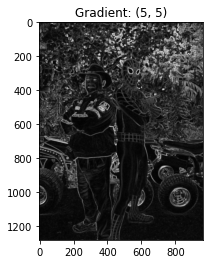

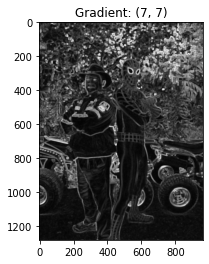

In [75]:
#diferentes Kernls
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

# Morfological hats

In [76]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

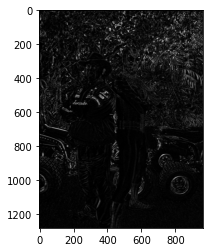

In [77]:
# sombrero blanco
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

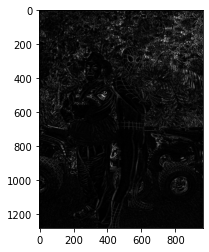

In [78]:
# sombrero negro
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()